[ Mini Project 2 ]    .     .    .     .     .      .   .    .    .    .    .     .  .  .  .  . .  .   . . . .       Project Code : SNRG
#sine-Curve Fitting using Standard Linear and Logistic Regression


Submitted by:
Group # 23

Prasanta Dutta   [20CS91F02]

Abhishek Kumar   [20CS91R02]

Deepak Mewada    [20CS91P02]


In [1]:
# Required library files are imported

import numpy as np  # For math operations
import matplotlib.pyplot as plt # For data plotting
import pandas as pd # For reading data from file
from sklearn.metrics import accuracy_score  # For comparing accuracy
from sklearn.model_selection import train_test_split  # For splitting data into train & test set

##1. Synthetic Data Generation and Curve Fitting

### 1.(a) Data Generation

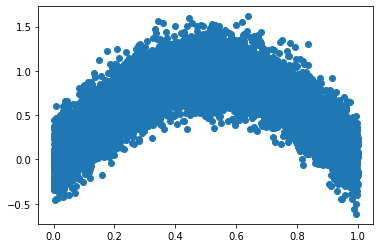

In [2]:
X = np.random.uniform(0,1,10000) # Generating 10000 points between [0,1] uniformly at random 
Y0 = np.sin(np.pi * X)  
noise = np.random.normal(0,0.2,10000) # Generating noise using gaussian distribution with mean 0 and std 1
Y= Y0 + noise # Data + noise
plt.scatter(X,Y) # Plotting data 

### 1.(b) Data extraction and histogram plotting

Text(0.5, 1.0, '(FIGURE 1) Histogram of 500 points of X')

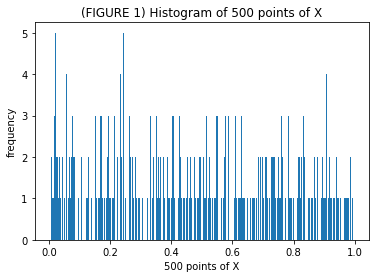

In [3]:
# Taking 1st 500 pts for further calculations
X500=X[:500]  
Y500=Y[:500]
plt.hist(X500,500)  # Plotting histogram
plt.xlabel("500 points of X")
plt.ylabel("frequency")
plt.title("(FIGURE 1) Histogram of 500 points of X")

### 1.(c) Data splitting

In [4]:
trainsize=int(0.75 * 500) # Train_size = 75% of total data
X500_train=X500[:trainsize] # X_train
X500_test=X500[trainsize:]  # X_test
Y500_train=Y500[:trainsize] # Y_train
Y500_test=Y500[trainsize:]  # Y_test
# Printing data sizes for confirmation
print(len(X500_train))  
print(len(X500_test))
print(len(Y500_train))
print(len(Y500_test))

375
125
375
125


### 1.(d) Gradient Descent & Error Prediction

In [5]:
# This function checks whether X and Y are of same size or not
def dataLenMismatch(X,Y):
  if(len(X)==len(Y)):
    return False
  else:
    print("ERROR : Data length mismatch\a")
    return True


In [6]:
# Gradient Descent Function
#   This function can work as Batch, Mini-batch & stochastic gradient descent
#   (batch_size = total_data_length) => batch gradient descent
#   (batch_size = 1) => stochastic gradient descent
#   (batch_size < total_data_length) => Mini-batch gradient descent
#   Input : X & Y
#   Output : estimated weights and training RMSE

def GD(X,Y):
  # Confirming the length of X & Y are same
  if(dataLenMismatch(X,Y)): 
    return
  # Parameters (tune them as you want)
  LR=0.1  # Learning rate 
  # Generally for stochastic gradient descent, LR changes with epoch
  LR_dividend=1 # new LR <- old LR / LR_dividend
  no_epochs=5000  # Number of iterations
  min_allowed_error=0.1 # Min allowed error until algo stops
  batch_size=len(X) # No. of samples to be processed per epoch
  w0=0  # Intercept
  # Slopes
  w1=1  
  w2=1
  w3=1
  # 
  epoch=1 # Initial epoch value
  cost=1  # Initial error
  # The following loop stops after 
  # predefined epoch or after certain error achieved
  while(epoch<=no_epochs and cost>min_allowed_error):
    # Generating random index from the given dataset
    index = np.random.choice(X.shape[0], batch_size, replace=False)
    X_sample=X[index] # Sampling X
    Y_sample=Y[index] # Sampling Y
    # Checking whether sample sizes are same or not
    if(dataLenMismatch(X_sample,Y_sample)): 
      return
    # Making prediction with current weights
    Y_pred=w0+w1*X_sample+w2*(X_sample**2)+w3*(X_sample**3)
    Diff=Y_sample-Y_pred  # Calculating differen between acutal & predicted Y
    # calcualting all the differentiation
    D_w0=(-2/batch_size) * np.sum(Diff)
    D_w1=(-2/batch_size) * np.sum(X_sample * Diff)
    D_w2=(-2/batch_size) * np.sum((X_sample**2) * Diff)
    D_w3=(-2/batch_size) * np.sum((X_sample**3) * Diff)
    # Adjusting weights
    w0= w0 - LR * D_w0
    w1= w1 - LR * D_w1
    w2= w2 - LR * D_w2
    w3= w3 - LR * D_w3
    epoch+=1  # Increasing epoch at every iteration
    LR/=LR_dividend # For variable learning rate
    # Making prediction based on whole data for calculating RMSE
    Y_pred_whole=w0+w1*X+w2*(X**2)+w3*(X**3)  
    cost=np.sqrt((1/len(X))*np.sum((Y-Y_pred_whole)**2)) # RMSE
  return [w0,w1,w2,w3,cost] # returning weights & training RMSE

In [7]:
# H predicts values based on weights and X
def H(w0,w1,w2,w3,X):
  return w0+w1*X+w2*(X**2)+w3*(X**3)
# RMSE function calculator
def RMSE(n,Y,Y_pred):
  return np.sqrt((1/len(Y))*np.sum((Y-Y_pred)**2))

# Note : It seems odd that we haven't used H and RMSE functions in GD
#        Because 1st, we thought to use the same GD in logistic regression
#        also. But as the tasks were performed in parallel, our team wrote 
#        another GD for logistic regression. So we left the hope of 
#        generalization.

In [8]:
w0,w1,w2,w3,train_error=GD(X500_train,Y500_train) # Performing GD on train data
# Error printing
print("Train RMSE error : ",train_error) 
print("Test RMSE error : ",RMSE(len(X500_test),Y500_test,H(w0,w1,w2,w3,X500_test)))

Train RMSE error :  0.20439213379667054
Test RMSE error :  0.1850548808813186


### 1.(e) Prediction plotting

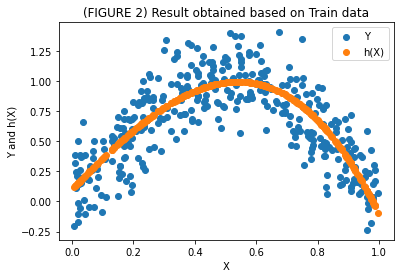

In [9]:
H_train=H(w0,w1,w2,w3,X500_train) # Prediction on train data
# Plotting train data with predictions
plt.scatter(X500_train,Y500_train,label="Y")
plt.scatter(X500_train,H_train,label="h(X)")
plt.xlabel("X")
plt.ylabel("Y and h(X)")
plt.title("(FIGURE 2) Result obtained based on Train data")
plt.legend()
plt.show()

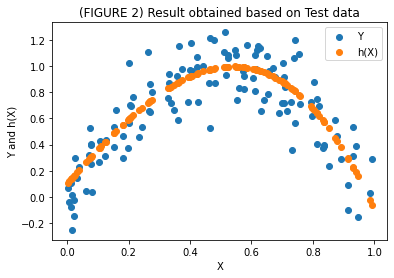

In [10]:
H_test=H(w0,w1,w2,w3,X500_test) # Prediction on test data
# Plotting test data with predictions
plt.scatter(X500_test,Y500_test,label="Y")
plt.scatter(X500_test,H_test,label="h(X)")
plt.xlabel("X")
plt.ylabel("Y and h(X)")
plt.title("(FIGURE 2) Result obtained based on Test data")
plt.legend()
plt.show()

##2. Variation of Loss/Error with m (sample size)

###2.(a) Data

In [11]:
# Prining data sizes 
print(len(X500))
print(len(Y500))

500
500


###2.(b) Different sample sizes

In [12]:
m=[10,20,50,100,200,500]  # Sample size

###2.(c) & 2.(d) m vs error

In [13]:
print("Variation of RMSE with m")
RMSE=[]
for data_size in m:
  # Extracting data with sample size
  data_X=X500[:data_size] 
  data_Y=Y500[:data_size] 
  w0,w1,w2,w3,cost=GD(data_X,data_Y)  # GD with sample size m
  RMSE.append(cost) # Accumulating all errors
  print(data_size,cost)

Variation of RMSE with m
10 0.2530798430484579
20 0.237998803270977
50 0.21683364043091774
100 0.2078180923557998
200 0.19439073910334284
500 0.199556527287957


###2.(e) Plot of m vs error

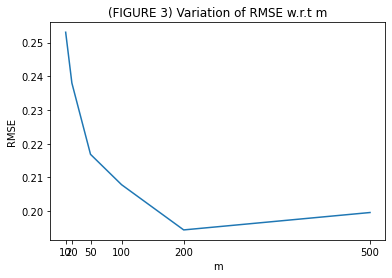

In [14]:
plt.plot(m,RMSE)  # Plotting RMSE
plt.xlabel("m")
plt.ylabel("RMSE")
plt.xticks(m)
plt.title("(FIGURE 3) Variation of RMSE w.r.t m")
plt.show()

As initially sample size was small, our predicted curve didn't find out the actual distribution of data, hence couldn't fit it properly.Thus we can see some fluctuation of RMSE. Gradually as the sample size increases, our predicted curve got the actual distribution of data, hence fit it properly. Thus the error stabilized.

## 3. logistic Regression
###**Problem Statement :**  
You are given the data for this part in the file named as log_reg_data.csv. It has two input/feature
columns X1 and X2, and a column for the output label Y



In [15]:
#reading the CSV file
df=pd.read_csv("/content/log_reg_data.csv")

In [16]:
#printing the content of datframe
print(df)

           X1        X2  Y
0    0.644929  0.041449  0
1   -0.098151  0.339747  1
2   -0.672678 -0.439159  0
3    0.942003 -0.063005  0
4   -0.033190 -0.882473  0
..        ...       ... ..
495  0.851884 -0.178722  0
496 -0.983745  0.236037  0
497  0.651799 -0.465621  0
498 -0.222419 -0.752022  0
499 -0.478453 -0.986082  0

[500 rows x 3 columns]


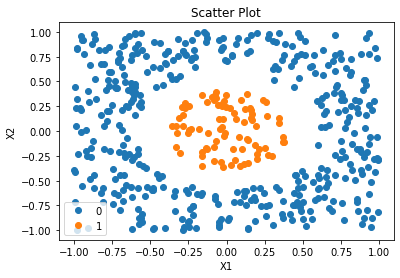

In [17]:
#plotting the data points

groups = df.groupby("Y")
for name, group in groups:
    plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=name)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot')    
plt.legend()


##3(a). 
Perform Logistic Regression on these points taking h(x) = sigmoid(Z) where Z = w0 + w1x1 + w2x2 + w3x1^2 +w4x2^2 and perform Gradient Descent using an appropriate cost function ( cost
function used for linear regression won’t work here). Use the final trained values of weights w
to calculate accuracy on train and test data sets. Print them as follows

Train RMSE error : [RMSE error value for train]

Test RMSE error : [RMSE error value for test]


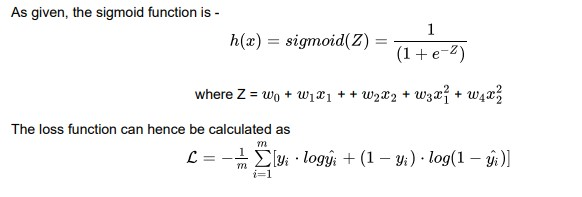

In [18]:
# function to map degree-1 input to higher order polynomial with degree-2 
# i.e [(X1,X2) -> (1 , X1, X2, X1^2, X2^2)]
# as the data data is non linearly separable so 1-d feature won't help
# and Z will be Z = w0 + w1x1 + w2x2 + w3x1^z + w4x2^2  

def featureMap(X1, X2):
    x0=np.ones(len(X1))
    X=[x0.T,X1,X2,np.square(X1),np.square(X2)]
    X=np.transpose(X)
    return X

In [19]:
#defining sigmoid function

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


In [20]:
#Defining Predict function
# it will predict class from given value of W and X

def predict(W,x):
    z=x.dot(W)
    pred_val = sigmoid(z)
    pred_class=pred_val
    pred_class=np.where(pred_class >= 0.5, 1, pred_class)
    pred_class=np.where(pred_class < 0.5, 0, pred_class)
    return pred_val, pred_class

In [21]:
#Defining Cross-Entropy Cost Function 
#It will return cross Entropy loss calculated from given predicted class and actual class 

def get_cost( y, y_hat):
    return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))


In [22]:
#function to calculate accuracy
def get_accuracy(Y_pridClass,Y_actualClass):
    acc=np.equal(Y_pridClass, Y_actualClass).sum()/len(Y_pridClass)
    return acc

In [23]:
#Gradiesnt Descent Implemetation

def gd(X,Y,epoch=100,learning_rate=0.5):
    W=[1,1,1,1,1]
    W=np.transpose(W)
    all_costs = []
    accs = []
    for each_iter in range(epoch):
      y_hat, c_hat = predict(W,X)
      current_cost = get_cost (Y, y_hat)
      N = len(X)
      dldw =-(1.0/N)*np.transpose(X).dot(Y-y_hat)
      W = W - learning_rate*dldw
      all_costs.append(current_cost)
      #if each_iter % 10 == 0:
      #  print('Iteration: ', each_iter, 'Cost: ', current_cost)
      #  each_iter += 1
      acc = get_accuracy(c_hat,Y)
      accs.append(acc)
    return [W,all_costs,accs]


In [24]:
#dfX = pd.DataFrame(df, columns = ['X1', 'X2'])

#Splitting the data into test and train set
#X_train, X_test, y_train, y_test = train_test_split(dfX, df.Y, test_size=0.70)
df_train, df_test = train_test_split(df, test_size=0.30)
y_train=df_train.Y
y_test=df_test.Y

In [25]:
#Mapping (X1,X2) to (1 , X1, X2, X1^2, X2^2),)  
#As in problem Z is given as Z= w0 + w1x1 + w2x2 + w3x1^z + w4x2^2 but the input is X1,X2 so feature mapping is required
X_train=featureMap(df_train.X1, df_train.X2)
X_test=featureMap(df_test.X1, df_test.X2)


In [33]:
#calling Gradient descent to find best fit weight for classification
num_iterations=500
learning_rate=0.8
W,all_costs,accuracies=gd(X_train,y_train,num_iterations,learning_rate)

#print accuracy for Train and Test set we got after Using the final trained values of weights w
ytrain_hat, Ytrain_predClass = predict(W,X_train)
ytest_hat, Ytest_predClass = predict(W,X_test)
train_accuracy=get_accuracy(Ytrain_predClass,y_train)
test_accuracy=get_accuracy(Ytest_predClass,y_test)

print("Accuracy of Train Data = \t{:0.2f}".format(train_accuracy*100), "%")
print("Accuracy of Test Data = \t{:0.2f}".format(test_accuracy*100), "%")

Accuracy of Train Data = 	100.00 %
Accuracy of Test Data = 	100.00 %


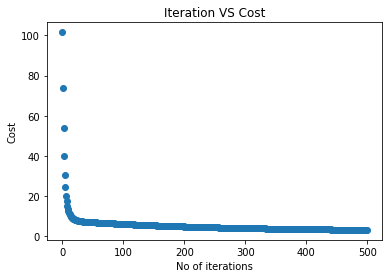

In [27]:
#Plotting cost vs Iteration
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.title('Iteration VS Cost')  

plt.scatter( range(num_iterations), all_costs)

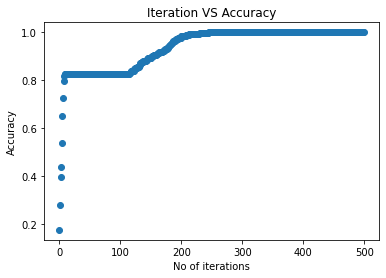

In [28]:
#Plotting Accuracy vs Iteration
plt.xlabel('No of iterations')
plt.ylabel('Accuracy')
plt.title('Iteration VS Accuracy')  

plt.scatter( range(num_iterations), accuracies)

##3(b) 
Plot Y vs X by plotting the points of X1, X2 and use Y values to show points in different colours
based on value of Y
Now on the same figure plot the points of curve Z vs X to show how well curve Z divides the
points of X (FIGURE 5)

In [29]:
#Function to plot decision boundary 

def plotDecisionBoundary(W,axes):
    u = np.linspace(-1, 1, 50)
    v = np.linspace(-1, 1, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    feature_set=featureMap(U,V)
    Z=feature_set.dot(W)
    #Z = W[0]+W[1]*U+W[2]*V+W[3]*(U**2)+W[4]*(V**2)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['Class-1', 'Class-0', 'Decision Boundary'])
    return cs

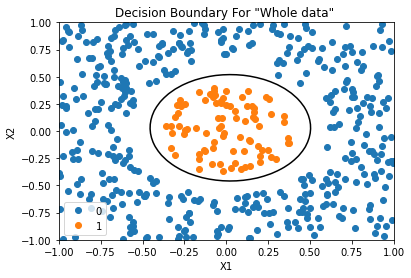

In [30]:
#Plotting Point w.r.t class and calling Decision Boundary function 
#Points are colored according to their class

groups = df.groupby("Y")
for name, group in groups:
    plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=name)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary For "Whole data" ')  

plotDecisionBoundary(W,plt)  
plt.legend()

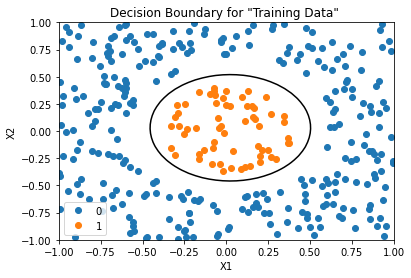

In [31]:
#Plotting Point w.r.t class and calling Decision Boundary function 
#Points are colored according to their class

groups = df_train.groupby("Y")
for name, group in groups:
    plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=name)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for "Training Data" ')  

plotDecisionBoundary(W,plt)  
plt.legend()

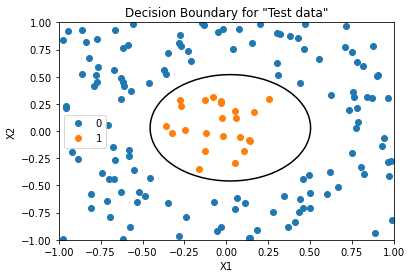

In [32]:
#Plotting Point w.r.t class and calling Decision Boundary function 
#Points are colored according to their class

groups = df_test.groupby("Y")
for name, group in groups:
    plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=name)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for "Test data"')  

plotDecisionBoundary(W,plt)  
plt.legend()

---
                                    That's it from Team-23. 

                                        Thank You :)

---



